reference = https://dafriedman97.github.io/mlbook/content/c1/construction.html

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes 
diab = load_diabetes()


In [4]:
X = diab['data']
y = diab['target']

use Loss func and estimate parameter(B).
use an in-sample prediction to use in the loss func

In [5]:
class LinearRegression:

    def fit(self, X, y, intercept = False):

        # record data and dimensions
        if intercept == False: # add intercept (if not already included)
            ones = np.ones(len(X)).reshape(len(X), 1) # column of ones 
            X = np.concatenate((ones, X), axis = 1)
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        
        # estimate parameters
        XtX = np.dot(self.X.T, self.X)
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)
        
        # make in-sample predictions
        self.y_hat = np.dot(self.X, self.beta_hats)
        
        # calculate loss
        self.L = .5*np.sum((self.y - self.y_hat)**2)
        
    def predict(self, X_test, intercept = True):
        
        # form predictions
        self.y_test_hat = np.dot(X_test, self.beta_hats)

In [6]:
model = LinearRegression() # instantiate model
model.fit(X, y, intercept = False) # fit model

In [7]:
sns.set()

The closer the points lie to the 45-degree line, the more accurate the fit. 

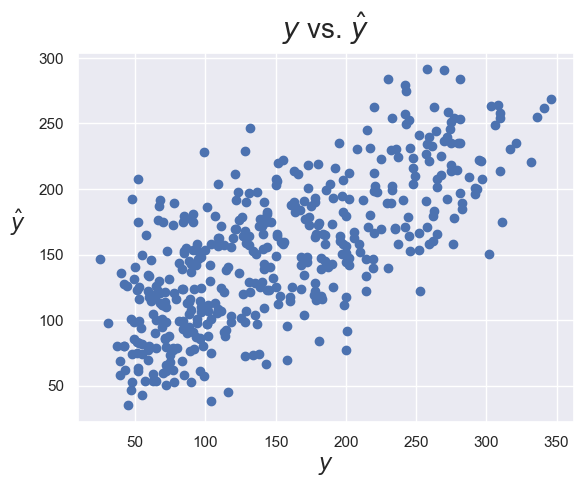

In [8]:
fig, ax = plt.subplots()
plt.scatter(model.y, model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
plt.show()

In [11]:
predictions = model.y_hat

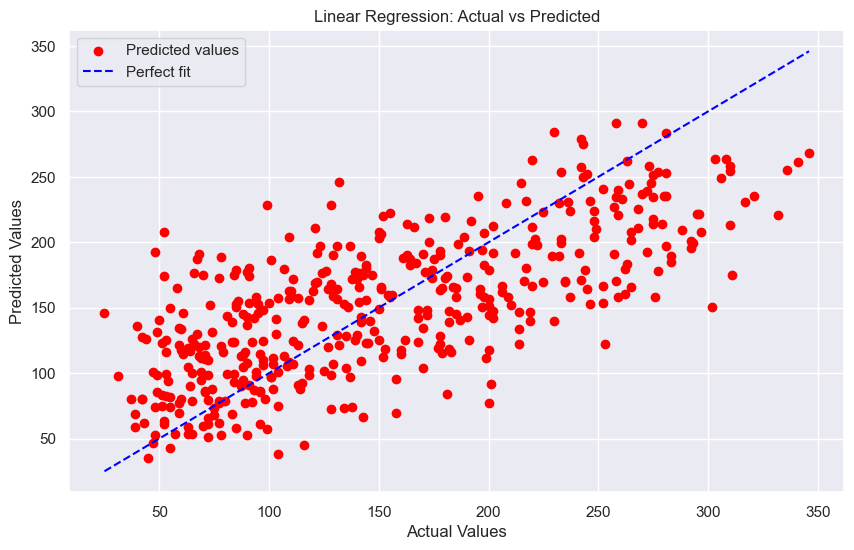

In [12]:
plt.figure(figsize=(10, 6)) 
plt.scatter(y, predictions, color='red', label='Predicted values') 
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='blue', label='Perfect fit') 
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.legend()